# Защита персональных данных клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию, а также обосновать корректность его работы. 

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# избавимся от предупреждений
import warnings
warnings.filterwarnings('ignore')

In [3]:
# откроем файл
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [4]:
def data_overview(data, hist, pie, bars):
    
    # выведем информацию о датасете
    print(data.info(), end='\n')
    
    # выведем описание датасета
    print(data.describe())
    print()
    
    # выведем первые строчки датафрейма для лучшего понимания структуры
    print(data.head(), end='\n')
    
    # построим гистограммы и, круговые и столбчатые диаграммы по численным столбцам
    for col in pie:
        data[col].value_counts().plot(kind='pie', autopct='%1.0f%%')
        plt.ylabel('')
        plt.title(col)
        plt.show()
    
    for col in bars:
        data[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()
        
    data[hist].hist(figsize=(10, 4), bins=15);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33300.000000     0.000000           0.000000
50%       0.000000    30.000000  

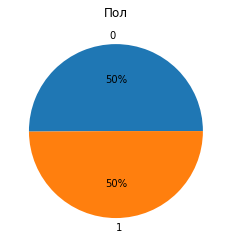

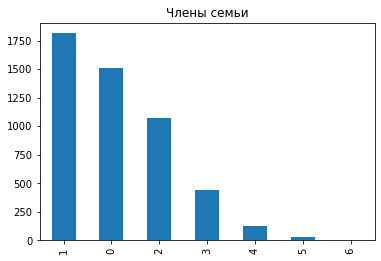

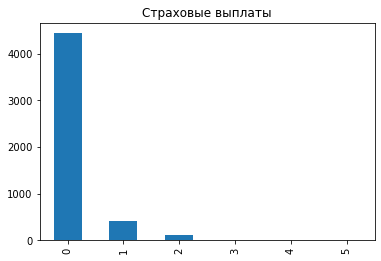

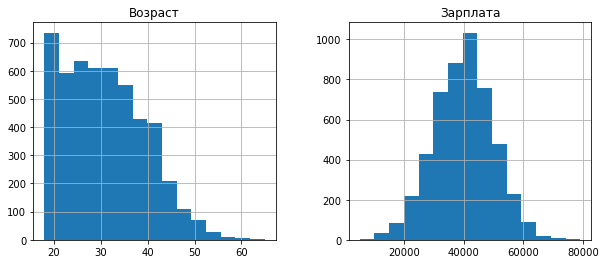

In [5]:
hist = ['Возраст', 'Зарплата']
pie = ['Пол']
bars = ['Члены семьи', 'Страховые выплаты']
data_overview(data, hist, pie, bars)

В данных отсутствуют пропуски.  
  
По графику можно заметить , что баланс классов по полу клиентов соблюден. Зарплата клиентов распределена примерно равномерно со средним значением около 39916 и стандартным отклонением 9900, распределение по возрасту напоминает биномиальное с средним значением около 30 лет и медианой равной 24 года. В выборке больше клиентов с одним членом семьи и с отсутствием страховых выплат  
  
Также, для удобства, переименуем названия столбцов в датафрейме, чтобы они были на английском языке

In [6]:
columns = ['sex', 'age', 'wage', 'family_members', 'insurance_payments']
data.columns = columns
#data.head()

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** при домножении признаков на обратимую матрицу качество линейной регрессии не изменится, при условии, что ее можно обучить заново

**Обоснование:**   
  
*Так как по заданию мы можем заново обучить регрессию, выведем формулу для обучения на новых признаках:*
$$ a_{new} = XPw_{new} $$
$$ w_{new} = \arg\min_w MSE(XPw, y) $$
$$ MSE = (y-XPw)^{T}(y-XPw) -> min_w $$
$$ FOC: d(y-XPw)^{T}(y-XPw)+(y-XPw)^{T}d(y-XPw) = $$
$$ = 2(y-XPw)^{T}d(y-XPw) = $$
$$ = 2(y-XPw)^{T}(-XP) = 0 $$
$$ (y-XPw)^{T}XP = 0 $$
$$ (XP)^{T}(y-XPw) = 0 $$
$$ (XP)^{T}y = (XP)^{T}XPw $$  
  
$$ w_{new} = ((XP)^{T}XP)^{-1}(XP)^{T}y = $$
$$ = (P^{T} (X^{T} X) P)^{-1} (XP)^{T} y = $$
$$ = P^{-1} (X^{T} X)^{-1} (P^{T})^{-1} P^{T} X^{T} y = $$
$$ = P^{-1} (X^{T} X)^{-1} X^{T} y $$
  
*Предсказания раньше (без домножения на P):*  
$$ a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w_{new} $$
  
*Подставив получившееся значение w_new в формулу предсказаний, мы получим:*
  
$$ a = (XP) P^{-1} (X^{T} X)^{-1} X^{T} y $$
$$ = X P P^{-1} (X^{T} X)^{-1} X^{T} y = $$
$$ = X (X^{T} X)^{-1} X^{T} y $$
  
Таким образом, при домножении матрицы с признаками на обратимую матрицу Р мы получили такое же значение предсказаний, как и без домножения (пользуясь условием, что регрессию можно обучить заново). Следовательно, можно сделать вывод, что качество регрессии не изменится при домножении матрицы признаков на обратимую матрицу Р

## Алгоритм преобразования

**Алгоритм**

В целях защиты данных клиентов, проведем следующие шаги:  
1) Разделим датасет на признаки и целевой признак
2) Создадим квадратную обратимую матрицу P с размернотью, равной количеству столбцов в наборе признаков
3) Проверим получившуюся матрицу на обратимость
4) Домножим все признаки на обратимую матрицу P

**Обоснование**

Как было доказано ранее, качество линейной регрессии не изменится при домножении признаков на обратимую матрицу (при возможности обучения линейной регрессии заново)

Сначала разделим признаки на обычные и целевой

In [7]:
features = data.drop('insurance_payments', axis=1)
target = data['insurance_payments']

Теперь нужно создать алгоритм генерации обратимой матрицы, чтобы домножить на нее признаки

In [8]:
# Сохраним размерность матрицы Р
size = len(columns) - 1

# Чтобы матрица Р не менялась при каждом выводе, сохраним random seed
np.random.seed(12345)

# Напишем цикл для построении матрицы Р и ее проверки на обратимость
# Цикл бесконечный, он прерывается в том случае, когда матрица обратима
while True:
    p = np.random.randint(0, 10, size=(size, size))
    try:
        product = np.dot(p, np.linalg.inv(p))
        if (product == np.identity(size)).all():
            break
    except:
        continue
#np.dot(p, np.linalg.inv(p))

print(f'Получившаяся матрица Р:\n {p}')

Получившаяся матрица Р:
 [[5 2 5 2]
 [8 0 7 2]
 [6 4 7 1]
 [8 0 6 2]]


Защитим данные клиентов с помощью умножения полученной матрицы Р на признаки

In [9]:
protected_features = pd.DataFrame(np.dot(features.values, p), columns=features.columns)
# protected_features

Разделим выборки на тренировочную и тестовую и также сохраним защищенные признаки из упомянутых выборок. Для этого умножим незащищенные признаки из упомянутых выборок на матрицу Р

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345
)

In [11]:
features_train_protected = np.dot(features_train, p)
features_test_protected = np.dot(features_test, p)

## Проверка алгоритма

Напишем функцию для построения модели линейной регрессии. Функция принимает на вход обучающие и тестовые выборки с признаками и целевым признаком, а также - описание признаков (в нашем случае - изначальных / защищенных). Функция строит модель линейной регрессии, обучает ее на тренировочной выборке, строит прогнозы на тестовой выборке и возвращает саму модель и мерку r2 score. Также, функция выводит получившийся r2 score модели на экран

In [12]:
def regression_builder(features_train, features_test, target_train, target_test, 
                       description='изначальных'):
    model = LinearRegression()
    model.fit(features_train, target_train)

    predictions = model.predict(features_test)
    r2 = r2_score(target_test, predictions)

    print(f'R2 линейной регрессии при {description} признаках: {r2}')
    
    return model, r2

Оценим качество модели на незащищенных данных

In [13]:
model_unprotected, r2_unprotected = regression_builder(
    features_train, features_test, target_train, target_test
)

R2 линейной регрессии при изначальных признаках: 0.41176839567705226


Оценим качество модели на защищенных данных. Для этого обучим модель линейной регрессии на новых признаках и также посчитаем r2 score

In [14]:
model_protected, r2_protected = regression_builder(
    features_train_protected, features_test_protected, target_train, target_test, 
    description='защищенных'
)

R2 линейной регрессии при защищенных признаках: 0.41176839567710033


R2 моделей на изначальных и защищенных признаках совпадает, из чего можно сделать вывод, что защита данных клиентов прошла успешно и качество модели не пострадало

## Вывод

Подводя итоги, целью данного проекта было защитить данные клиентов таким образом, чтобы не потерять качество модели линейной регрессии.  
  
Сначала мы открыли файл с данными и изучили его. На данном этапе мы выяснили следующее: 
- Выборка по полу клиентов сбалансированная
- Зарплата клиентов распределена примерно равномерно
- Распределение возраста клиентов напоминает биномиальное
- В выбрке преобладают клиенты с одним членом в семье
Также, мы изменили названия столбцов в датасете для удобства.  
  
На следующем этапе мы доказали следующий факт: 
- Если уножить признаки на обратимую матрицу, качество линейной регрессии не изменится, при условии, что модель можно обучить заново на новых признаках
  
Доказательство выше упомянутого факта натолкнуло нас на следующую мысль: данные клиентов можно защитить домножением на обратимую матрицу Р, сгенерированную рандомным образом. Таким образом, персональные данные клиентов будут преобразованы, а качество регрессии не изменится.  
  
Далее, мы описали алгоритм действий, преобразовали данные в соотвестсвии с ним и доказали, что качество регрессии не изменится для модели, построенной по защищенным признакам. Для измерения качества регрессии использовалась мерка R2 score. Для моделей, построенных на изначальных и защищенных данных, качество регрессии получилось одинаковым - примерно `0.412`.  
  
Таким образом, цель данного проекта была выполнена: персональные данные клиентов были защищены, а качество линейной регрессии на преобразованных данных не изменилось. Проект может быть представлен заказчику.